# Configuration

In [1]:
PVF10_PROCESSED_DATA_DIR = "../data/processed"
PVF10_CSVFILE = "structure_pvf_10.csv"

PVF10_AUGMENTED_DATA_DIR = "../data/raw/PVF-10/PVF_10_110x60/augmented"

# Chargement du dataset d'origine

## Chargement du fichier csv généré à l'étape d'exploration

In [2]:
from pathlib import Path
import pandas as pd

pvf10_processed_datapath = Path(PVF10_PROCESSED_DATA_DIR)
df_pvf10 = pd.read_csv(pvf10_processed_datapath / PVF10_CSVFILE)

display(df_pvf10)

Chemin  Format Train_Test  \
0      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
1      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
2      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
3      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
4      ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
...                                                  ...     ...        ...   
16711  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16712  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16713  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16714  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   
16715  ../data/raw/PVF-10\PVF_10_Ori\train\10healthy ...     Ori      train   

                       Classe                               Nom  Type  \
0      substring open circuit  DJI_20230228122654_0466_T_000001  .png   
1      substring open circuit  DJI_20230228122803_0500_T_000001  .png   
2      substring open circuit  DJI_20230228123425_0666_T_000002  .png   
3      substring open circuit  DJI_20230228124402_0129_T_000002  .png   
4      substring open circuit  DJI_20230228124624_0220_T_000001  .png   
...                       ...                               ...   ...   
16711           healthy panel  DJI_20231121165445_0658_T_000004  .tif   
16712           healthy panel  DJI_20231121165536_0682_T_000002  .tif   
16713           healthy panel  DJI_20231121165610_0698_T_000002  .tif   
16714           healthy panel  DJI_20231121165943_0012_T_000003  .tif   
16715           healthy panel  DJI_20231121170238_0094_T_000002  .tif   

       Largeur  Hauteur  Canaux  Doute_Carre  
0           60      110       3        False  
1           60      110       3        False  
2           60      110       3        False  
3           60      110       3        False  
4           60      110       3        False  
...        ...      ...     ...          ...  
16711       69      109       3        False  
16712       65      110       3        False  
16713       63      109       3        False  
16714       70      116       3        False  
16715       68      108       3        False  

[16716 rows x 10 columns]

## Sélection et filtrage des images au format 110x60

On sélectionne uniquement les images au format 110x60 et on retire les images étiquetées "Doute_Carre".

In [3]:
df_pvf10_filtered = df_pvf10.loc[(df_pvf10["Format"] == "110x60") & (df_pvf10["Doute_Carre"] == False)].drop(columns=["Canaux", "Type"])

In [4]:

display(df_pvf10_filtered)

Chemin  Format Train_Test  \
0     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
1     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
2     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
3     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
4     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
...                                                 ...     ...        ...   
5567  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5568  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5569  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5570  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   
5571  ../data/raw/PVF-10\PVF_10_110x60\train\10healt...  110x60      train   

                      Classe                               Nom  Largeur  \
0     substring open circuit  DJI_20230228122654_0466_T_000001       60   
1     substring open circuit  DJI_20230228122803_0500_T_000001       60   
2     substring open circuit  DJI_20230228123425_0666_T_000002       60   
3     substring open circuit  DJI_20230228124402_0129_T_000002       60   
4     substring open circuit  DJI_20230228124624_0220_T_000001       60   
...                      ...                               ...      ...   
5567           healthy panel  DJI_20231121165445_0658_T_000004       60   
5568           healthy panel  DJI_20231121165536_0682_T_000002       60   
5569           healthy panel  DJI_20231121165610_0698_T_000002       60   
5570           healthy panel  DJI_20231121165943_0012_T_000003       60   
5571           healthy panel  DJI_20231121170238_0094_T_000002       60   

      Hauteur  Doute_Carre  
0         110        False  
1         110        False  
2         110        False  
3         110        False  
4         110        False  
...       ...          ...  
5567      110        False  
5568      110        False  
5569      110        False  
5570      110        False  
5571      110        False  

[5338 rows x 8 columns]

## Chargement des images (objets PVModule)

In [5]:
from pathlib import Path
import cv2
from sep24_cds_pv.features.pvmodule import PVModule

modules = {}

# On parcourt l'ensemble des images
for row in df_pvf10_filtered.itertuples(index=False):
    
    # Ici on corrige le chemin en remplaçant les '\\' (séparateurs windows) par un '/', universellement compris par pathlib
    image_path = Path(row.Chemin.replace("\\", "/"))

    # Récupération de l'image en couleur
    img = cv2.imread(image_path)
    # Conversion en niveaux de gris
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    classe = row.Classe
    split = row.Train_Test
    format = row.Format
    
    # Créationde l'objet PVModule
    module = PVModule(image=image_path, 
                    format=format,
                    original_split=split,
                    color_array=img,
                    array=img_gray, 
                    status=classe,
                    )

    modules[row.Nom] = module

Nombre de modules chargés

In [6]:
print(f"Number of modules: {len(modules)}")

Number of modules: 5338


# Affichage au hasard d'un module de chaque classe

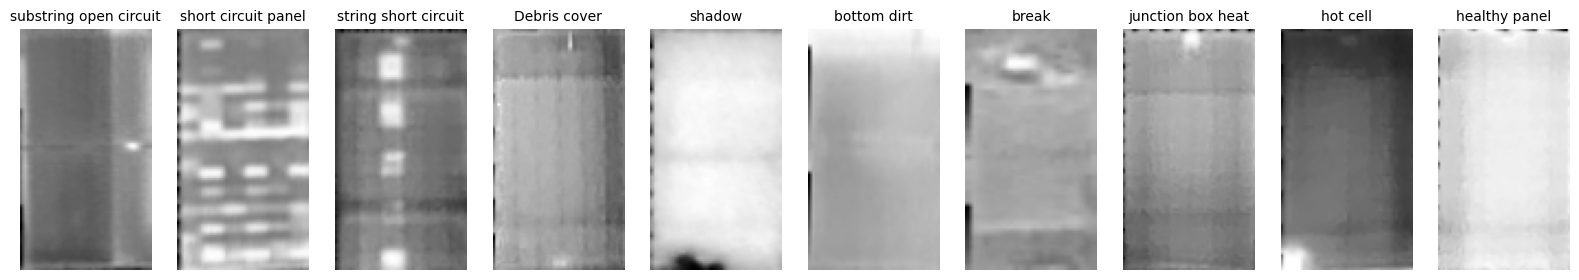

In [7]:
import matplotlib.pyplot as plt

selected_modules_names = []

classe_values = df_pvf10_filtered["Classe"].unique()

# Création d'une figure pour afficher les modules
fig, ax = plt.subplots(1, len(classe_values), figsize=(20, 4))
idx_ax= 0

for classe in classe_values:

    # Récupération du nom du module sélectionné pour cette classe
    module_name = df_pvf10_filtered.loc[df_pvf10_filtered["Classe"] == classe, "Nom"].sample(n=1).squeeze()
    
    # Ajout à la liste des modules sélectionnés
    selected_modules_names.append(module_name)

    # Ajout à la figure
    ax[idx_ax].set_title(classe)
    ax[idx_ax].title.set_size(10)
    ax[idx_ax].axis('off')
    ax[idx_ax].imshow(modules[module_name].array, cmap='gray')
    
    idx_ax+=1

plt.show()

# Fonction permettant de tester un ensemble de transformations

On définit une fonction permettant d'appliquer un ensemble de transformations à évaluer sur chacun des modules sélectionnés. \
Pour chaque transformation de la liste, la fonction transforme l'image initiale, puis affiche l'image résultante.

In [8]:
import numpy as np

def apply_transformations(
    transformations: dict,
):

    def subplot(idx, total_plots, name, img):
        """Plot the img at the idx subplot with title"""
        plt.subplot(1, total_plots, idx)
        plt.imshow(img, cmap="gray")
        plt.title(name, fontsize=10)
        plt.axis('off')


    for module_name in selected_modules_names:

        module = modules[module_name]

        print(f"Image : {module.image.name} | Classe : {module.status}")

        t_number = len(transformations)
        plt.figure(figsize=((t_number+1)*2+1, 3))

        image = module.color_array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        subplot(1, t_number+1, "original_110x60", module.array)
        plt.title("original_110x60", fontdict={'size': 10, 'weight': 'bold', 'color': 'red'})

        for idx, (transform_name, transform) in enumerate(transformations.items()):

            transformed_data = transform(image=image)
            transformed_image = transformed_data['image']

            subplot(idx+2, t_number+1, transform_name, transformed_image)

            if np.array_equal(transformed_image, module.array):
                print(f"'{transform_name}' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'")

        plt.show()


# Exploration des transformations possibles

## A l'aide de la bibliothèque Albumentations

Site web : https://albumentations.ai/

In [9]:
import albumentations as A

In [10]:
# On définit un dictionnaire permettant de contenir l'ensemble des transformations évaluées
all_transformations = {}

## En utilisant 'albumentations.toGray'

Image : DJI_20231116163010_0417_T_000001.png | Classe : substring open circuit
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


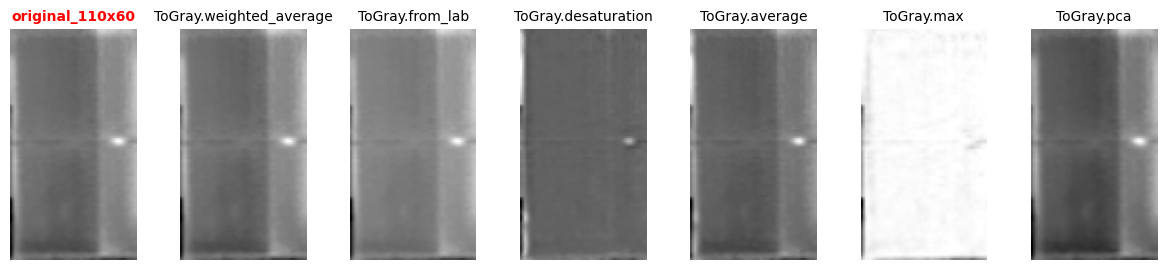

Image : DJI_20231116162324_0216_T_000001.png | Classe : short circuit panel
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


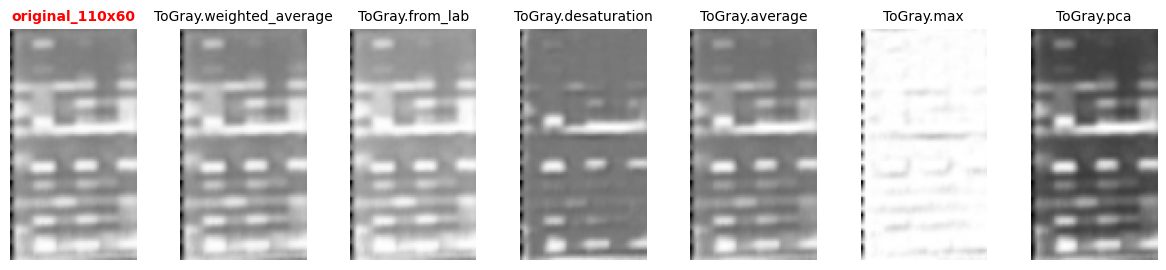

Image : DJI_20230223124129_0565_T_000001.png | Classe : string short circuit
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


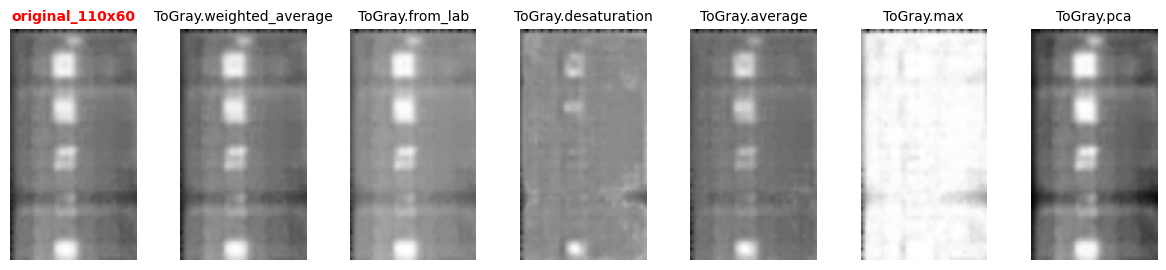

Image : DJI_20230513153553_0327_T_000003.png | Classe : Debris cover
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


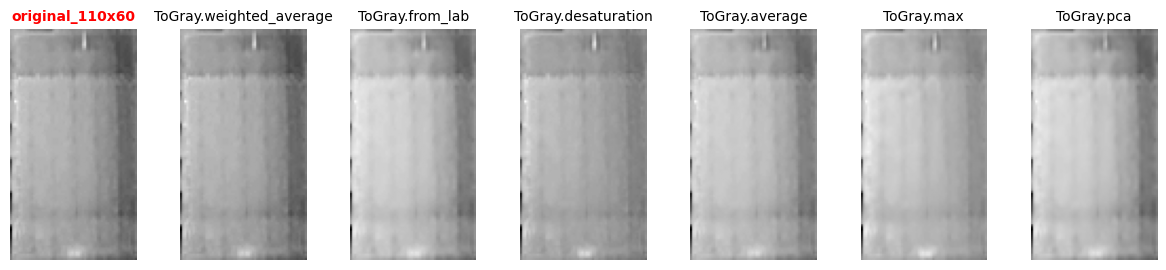

Image : DJI_20231110095424_0010_T_000008.png | Classe : shadow
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


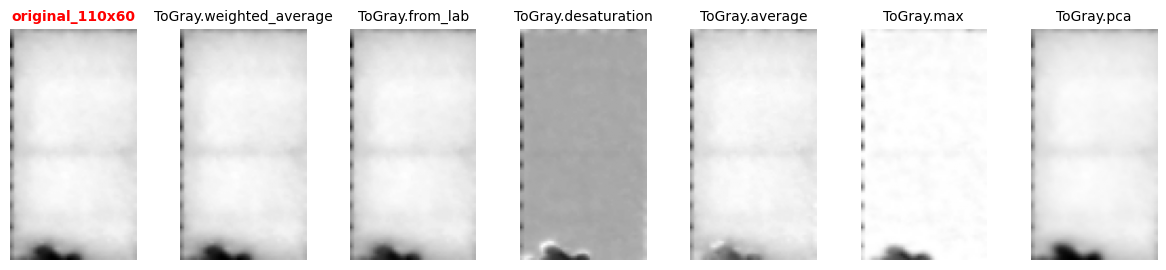

Image : DJI_20231114120227_0452_T_000013.png | Classe : bottom dirt
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


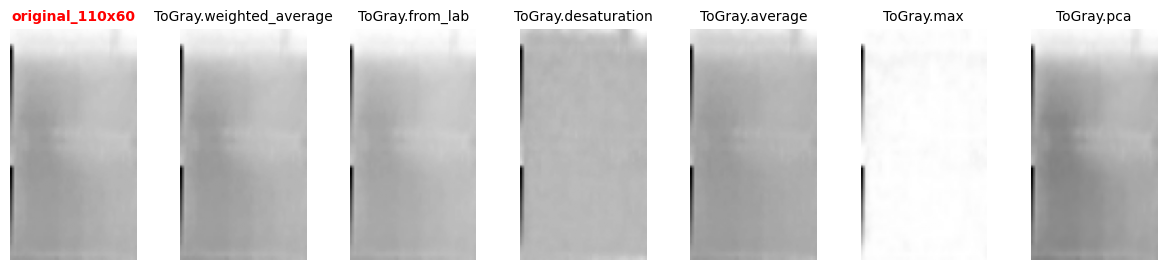

Image : DJI_20230411135729_0075_T_000001.png | Classe : break
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


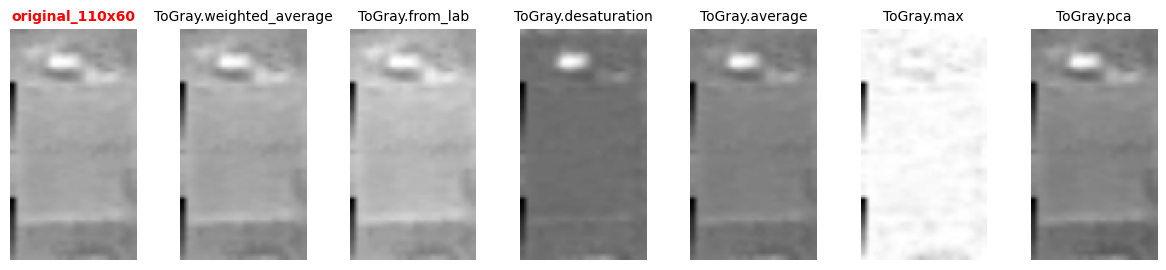

Image : DJI_20230227135343_0576_T_000007.png | Classe : junction box heat
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


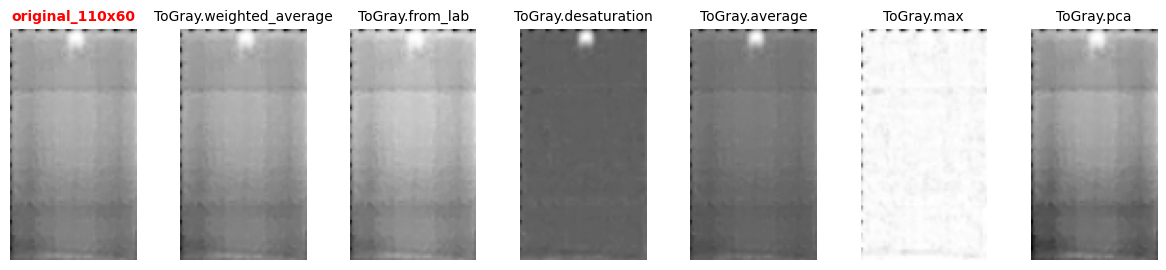

Image : DJI_20230228134045_0749_T_000002.png | Classe : hot cell
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


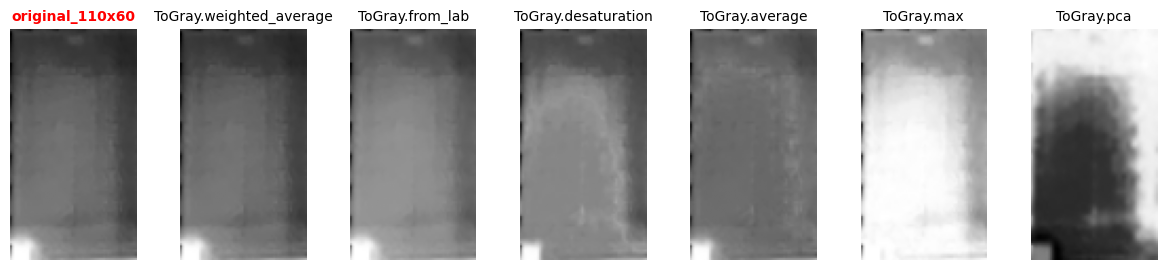

Image : DJI_20230228143113_0656_T_000003.png | Classe : healthy panel
'ToGray.weighted_average' is the same as 'cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)'


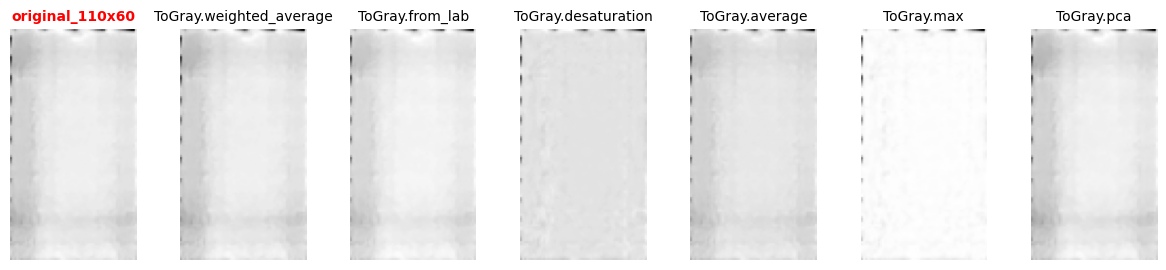

In [11]:
TRANSFORM_NAME = "ToGray"
METHODS = ["weighted_average", "from_lab", "desaturation", "average", "max", "pca"]

transformations = {}

for method_name in METHODS:

    transformation_name = f"{TRANSFORM_NAME}.{method_name}"
    transformation = A.ToGray(num_output_channels=1,
                              method=method_name,
                              p=1.)

    transformations[transformation_name] = transformation

all_transformations.update(transformations)

apply_transformations(transformations)


**Bilan** :

La méthode **weighted_average** correspond en fait à la méthode par défaut utilisée par openCV pour convertir nos images en niveaux de gris.

Les méthodes **from_lab** et **average** semblent pouvoir être retenues pour faire de l'oversampling au niveau des images elles-mêmes sur notre jeu de données.

La méthode **pca** assombrit l'image, mais pourrait être intéressante.

Les méthodes **max** et **desaturation** fait clairement perdre trop d'informations.

## En utilisant 'albumentations.ImageCompression'

Dans ce cas, la compression est appliquée à l'image RGB sur 3 canaux, et on utilise la conversion **ToGray "weighted_average"** pour convertir l'image en niveaux de gris.

Image : DJI_20231116163010_0417_T_000001.png | Classe : substring open circuit


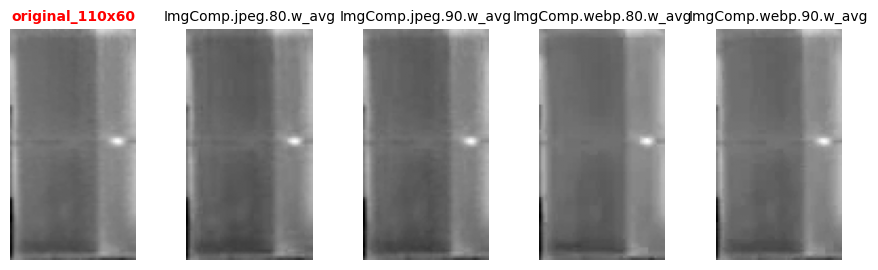

Image : DJI_20231116162324_0216_T_000001.png | Classe : short circuit panel


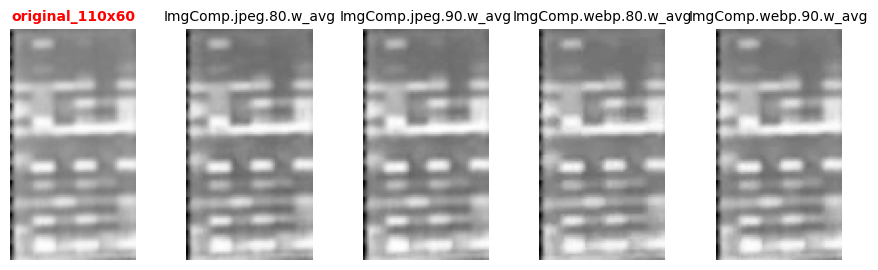

Image : DJI_20230223124129_0565_T_000001.png | Classe : string short circuit


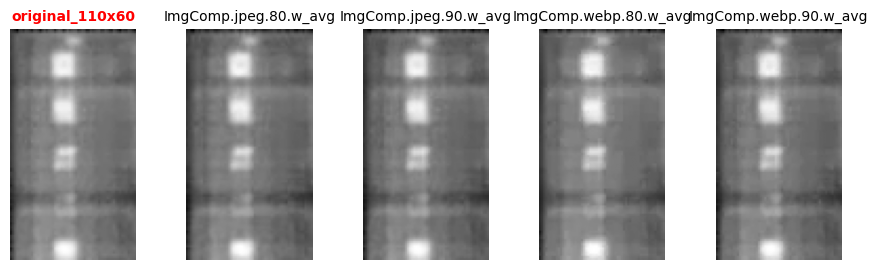

Image : DJI_20230513153553_0327_T_000003.png | Classe : Debris cover


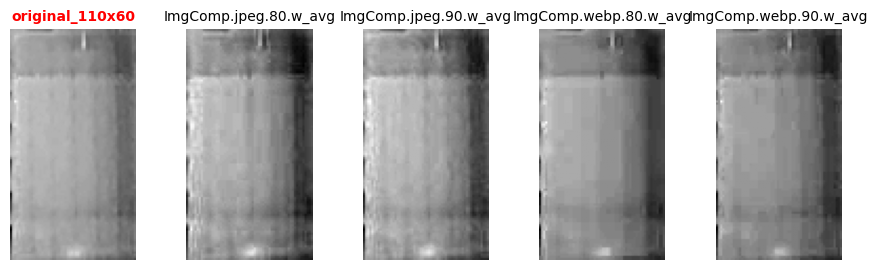

Image : DJI_20231110095424_0010_T_000008.png | Classe : shadow


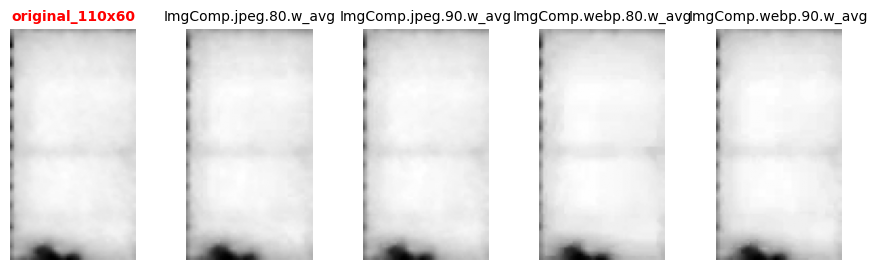

Image : DJI_20231114120227_0452_T_000013.png | Classe : bottom dirt


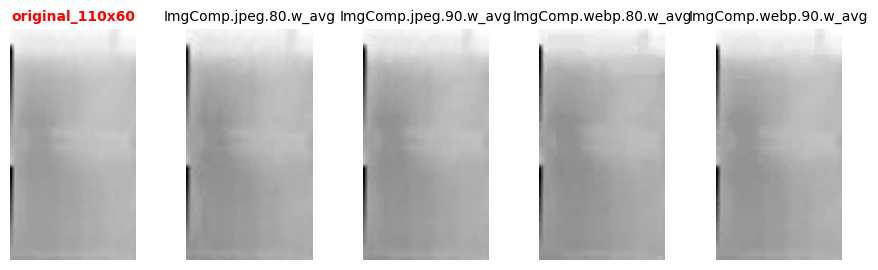

Image : DJI_20230411135729_0075_T_000001.png | Classe : break


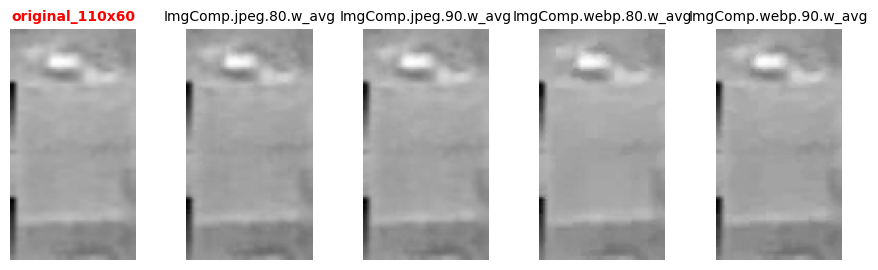

Image : DJI_20230227135343_0576_T_000007.png | Classe : junction box heat


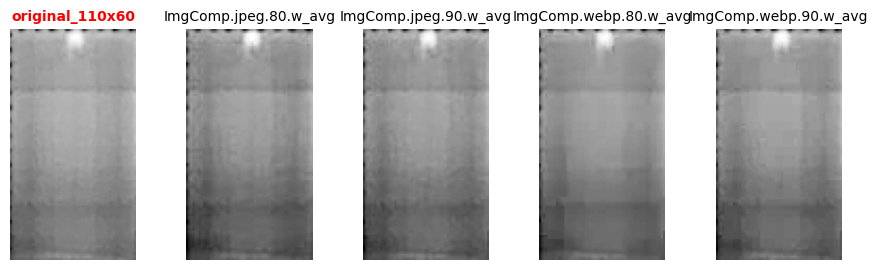

Image : DJI_20230228134045_0749_T_000002.png | Classe : hot cell


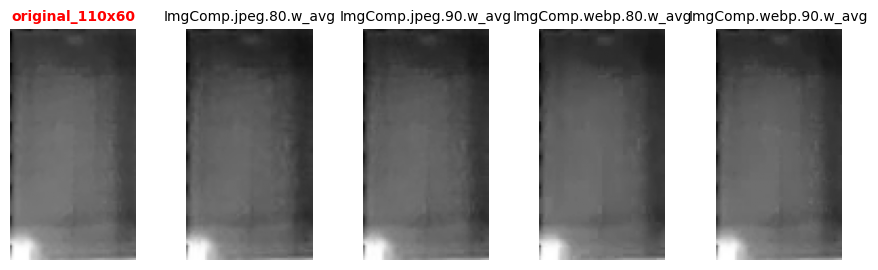

Image : DJI_20230228143113_0656_T_000003.png | Classe : healthy panel


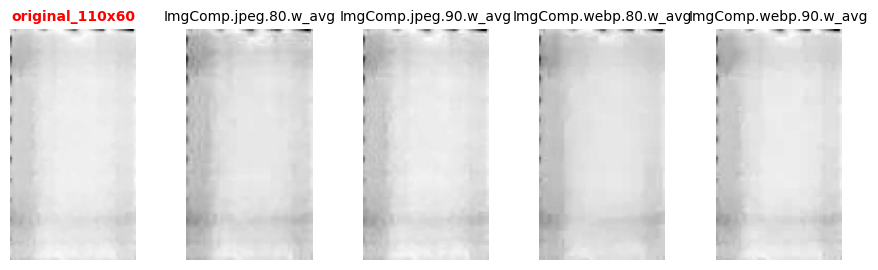

In [12]:
TRANSFORM_NAME = "ImgComp"
METHODS = ["jpeg", "webp"]
QUALITY = [80, 90]

transformations = {}

for method_name in METHODS:
    for quality in QUALITY:

        transformation_name = f"{TRANSFORM_NAME}.{method_name}.{quality}.w_avg"
        transformation = A.Compose([
                A.ImageCompression(quality_range=[quality, quality],
                                compression_type=method_name,                                                                                       
                                p=1.),
                A.ToGray(num_output_channels=1,
                        method="weighted_average",
                        p=1.),
            ])

        transformations[transformation_name] = transformation

all_transformations.update(transformations)

apply_transformations(transformations)


**Bilan** :

Pour chaque couple (méthode / niveau de compression), on constate effectivement que l'image 
  - est un peu plus **bruitée** (dans le cas de la compression JPEG) 
  - ou **lissée** (dans le cas de la compression WEBP), 

mais l'image semble bien conserver ses caractéristiques principales.

## En utilisant 'albumentations.MedianBlur'

Image : DJI_20231116163010_0417_T_000001.png | Classe : substring open circuit


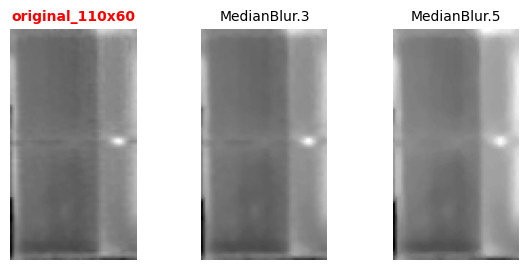

Image : DJI_20231116162324_0216_T_000001.png | Classe : short circuit panel


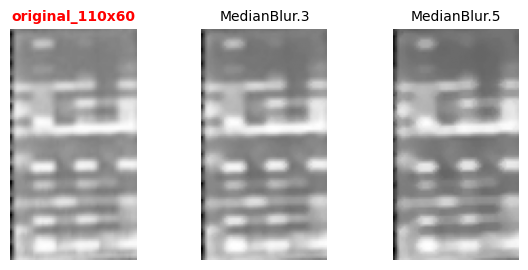

Image : DJI_20230223124129_0565_T_000001.png | Classe : string short circuit


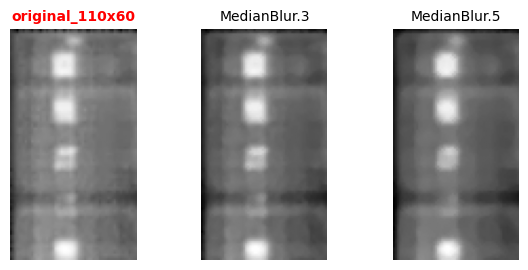

Image : DJI_20230513153553_0327_T_000003.png | Classe : Debris cover


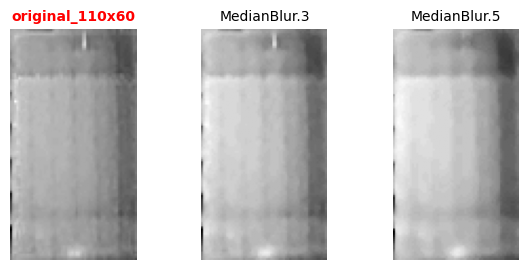

Image : DJI_20231110095424_0010_T_000008.png | Classe : shadow


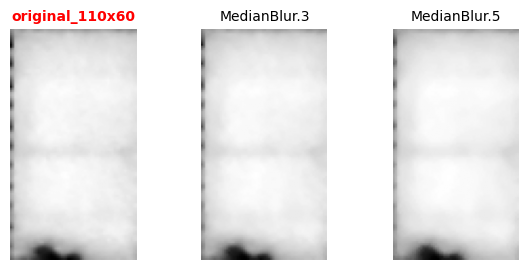

Image : DJI_20231114120227_0452_T_000013.png | Classe : bottom dirt


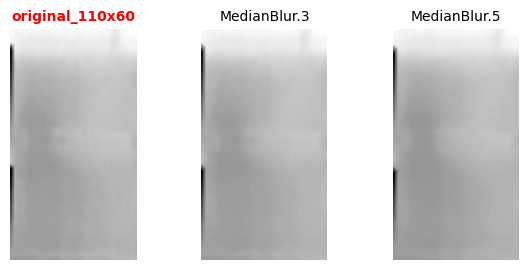

Image : DJI_20230411135729_0075_T_000001.png | Classe : break


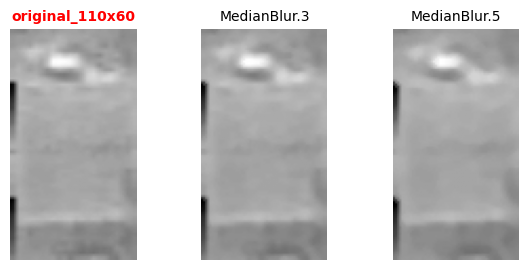

Image : DJI_20230227135343_0576_T_000007.png | Classe : junction box heat


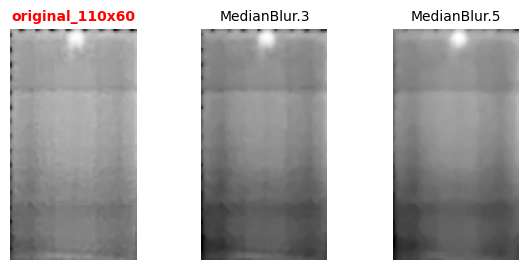

Image : DJI_20230228134045_0749_T_000002.png | Classe : hot cell


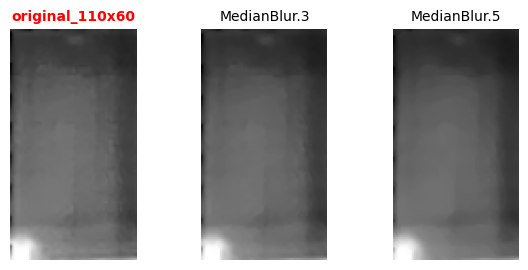

Image : DJI_20230228143113_0656_T_000003.png | Classe : healthy panel


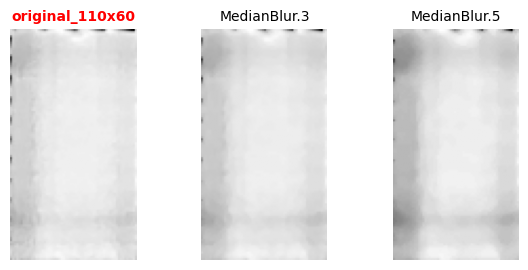

In [13]:
TRANSFORM_NAME = "MedianBlur"
BLUR_LIMITS = [3, 5]

transformations = {}

for blur_limit in BLUR_LIMITS:

    transformation_name = f"{TRANSFORM_NAME}.{blur_limit}"
    transformation = A.Compose([
        A.MedianBlur(blur_limit=[blur_limit, blur_limit],
                            p=1.),
        A.ToGray(num_output_channels=1,
                    method="weighted_average",
                    p=1.),
    ])

    transformations[transformation_name] = transformation

all_transformations.update(transformations)

apply_transformations(transformations)


**Bilan** :

L'application d'un flou de type MedianBlur est aussi une transformation intéressante, si on se limite à une taille de kernel de **3 pixels**. \
A 5 pixels, l'image devient plus floue et il y a un léger risque de perte d'information.

# Augmentation de notre jeu de données

## Rappel des proportions des différentes classes

Définition d'une fonction permettant d'afficher le nombre d'échantillons et les proportions de chaque classe de défauts dans un dataset donné.

In [14]:
import seaborn as sns

def plot_countplots(df, label):
    """Affiche des graphes 'count' et 'percent' de la répartition des classes dans le dataset"""

    plt.figure(figsize=(10,3))
    
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(data=df, y=label)
    ax1.bar_label(ax1.containers[0])
    
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(data=df, y=label, stat="percent")
    ax2.bar_label(ax2.containers[0])
    ax2.set(yticklabels=[])
    ax2.set(ylabel=None)

    plt.suptitle("Répartition des classes de défauts")
    plt.show()


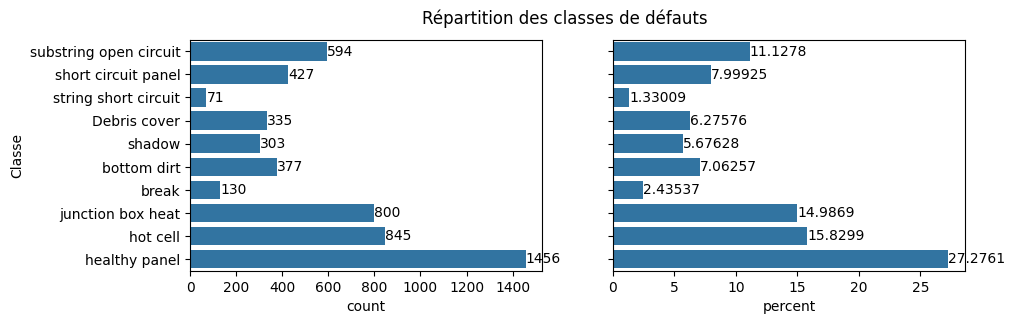

In [15]:
plot_countplots(df_pvf10_filtered, "Classe")

On va chercher à augmenter le nombre d'échantillons dans chaque classe minoritaire de la façon suivante :
  1. **String short circuit** : multiplier le nombre d'échantillons par 12
  2. **Break** : multiplier le nombre d'échantillons par 7
  3. **Shadow**, **Debris cover**, **Bottom dirt** : multiplier le nombre d'échantillons par 3
  4. **Short circuit panel** : multiplier le nombre d'échantillons par 2
  5. **Substring open circuit**, **Hot cell** et **Junction box heat** : pas de changement

## Transformations proposées

Voici les combinaisons de transformations proposées pour chaque classe dont on souhaite augmenter le nombre d'échantillons :

1. **String short circuit** : multiplier le nombre d'échantillons par 12 (appliquer 11 transformations)
    - **ToGray.from_lab** et **ToGray.average** -> 2 transformations
    - **ImageCompression.jpeg.80**, **ImageCompression.jpeg.90**, **ImageCompression.webp.80** et **ImageCompression.webp.90** + **ToGray.weighted_average** -> 4 transformations
    - **ImageCompression.jpeg.80**, **ImageCompression.jpeg.90**, **ImageCompression.webp.80** et **ImageCompression.webp.90** + **ToGray.average** -> 4 transformations
    - **MedianBlur.3** -> 1 transformation

2. **Break** : multiplier le nombre d'échantillons par 7 (appliquer 6 transformations)
    - **ToGray.from_lab** et **ToGray.average** -> 2 transformations
    - **ImageCompression.jpeg.80**, **ImageCompression.jpeg.90**, **ImageCompression.webp.80** et **ImageCompression.webp.90** + **ToGray.weighted_average** -> 4 transformations

3. **Shadow**, **Debris cover**, **Bottom dirt** : multiplier le nombre d'échantillons par 3
    - **ToGray.from_lab** et **ToGray.average** -> 2 transformations

4. **Short circuit panel** : multiplier le nombre d'échantillons par 2
    - **MedianBlur.3** -> 1 transformation


On ajoute au dictionnaire `all_transformations` les transformations mentionnées mais non encore évaluées.


In [16]:
TRANSFORM_NAME = "ImgComp"
METHODS = ["jpeg", "webp"]
QUALITY = [80, 90]

transformations = {}

for method_name in METHODS:
    for quality in QUALITY:

        transformation_name = f"{TRANSFORM_NAME}.{method_name}.{quality}.avg"
        transformation = A.Compose([
                A.ImageCompression(quality_range=[quality, quality],
                                compression_type=method_name,                                                                                       
                                p=1.),
                A.ToGray(num_output_channels=1,
                        method="average",
                        p=1.),
            ])

        transformations[transformation_name] = transformation

all_transformations.update(transformations)


## Application des transformations

On associe la liste des transformations à appliquer à chaque classe de module que l'on souhaite transformer.

In [17]:
class_transformations = {
    "string short circuit": [
        "ToGray.from_lab",
        "ToGray.average",
        "ImgComp.jpeg.80.w_avg",
        "ImgComp.jpeg.90.w_avg",
        "ImgComp.webp.80.w_avg", 
        "ImgComp.webp.90.w_avg", 
        "ImgComp.jpeg.80.avg",
        "ImgComp.jpeg.90.avg",
        "ImgComp.webp.80.avg", 
        "ImgComp.webp.90.avg", 
        "MedianBlur.3",
    ],
    "break": [
        "ToGray.from_lab",
        "ToGray.average",
        "ImgComp.jpeg.80.w_avg",
        "ImgComp.jpeg.90.w_avg",
        "ImgComp.webp.80.w_avg", 
        "ImgComp.webp.90.w_avg", 
    ],
    "shadow": [
        "ToGray.from_lab",
        "ToGray.average",
    ],
    "Debris cover": [
        "ToGray.from_lab",
        "ToGray.average",
    ],
    "bottom dirt": [
        "ToGray.from_lab",
        "ToGray.average",
    ],
    "short circuit panel": [
        "MedianBlur.3",
    ],
}

On parcourt ensuite la liste des modules et on applique les transformations choisies en fonction de la classe du module courant.

In [18]:
target_path = Path(PVF10_AUGMENTED_DATA_DIR)
target_path.mkdir(parents=True, exist_ok=True)

# Informations communes
FORMAT = "110x60"
TRAIN_TEST = "augmented"
TYPE = ".png"
DOUTE_CARRE = False

# Liste des nouvelles images générées
new_images = []

for module_name, module in modules.items():

    nom = module.image.stem
    classe = module.status
    print(f"Traitement du module '{nom}' (classe : '{classe}')")

    transformations_list = class_transformations.get(classe, [])

    if transformations_list:

        for transformation_name in transformations_list:

            # Transformation
            print(f"\tApplication de la transformation '{transformation_name}'")
            transformation = all_transformations[transformation_name]
            transformed_image = transformation(image=module.color_array)['image']

            # Sauvegarde de l'image transformée
            class_folder = f"xx{classe}"
            new_image_path = target_path / class_folder / f"{nom}.{transformation_name}.png"
            new_image_path.parent.mkdir(exist_ok=True)
            print(f"\tSauvegarde du fichier: {new_image_path}")
            cv2.imwrite(new_image_path, transformed_image)

            # Mise à jour de la liste des nouvelles images
            new_image_dict = {
                "Chemin": new_image_path.as_posix(),
                "Format": FORMAT,
                "Train_Test": TRAIN_TEST,
                "Classe": classe,
                "Nom": new_image_path.stem,
                "Type": TYPE,
                "Largeur": transformed_image.shape[0],
                "Hauteur": transformed_image.shape[1],
                "Canaux": 1,
                "Doute_Carre": False,
            }
            new_images.append(new_image_dict)

    else:
        print("\tPas de transformation. Skip")


Traitement du module 'DJI_20230228122654_0466_T_000001' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228122803_0500_T_000001' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228123425_0666_T_000002' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228124402_0129_T_000002' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228124624_0220_T_000001' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228124936_0330_T_000002' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228132327_0250_T_000001' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_20230228133117_0502_T_000006' (classe : 'substring open circuit')
	Pas de transformation. Skip
Traitement du module 'DJI_202302

In [19]:
print(f"Nombre de nouvelles images générées : {len(new_images)}")

Nombre de nouvelles images générées : 4018


## Création du dataset des nouvelles images

A partir de la liste des descriptions des nouvelles images, on crée un dataframe contenant les informations, à l'image du dataframe original.

In [20]:
df_pvf10_new_images = pd.DataFrame(new_images)
df_pvf10_new_images

Chemin  Format Train_Test  \
0     ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
1     ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
2     ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
3     ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4     ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
...                                                 ...     ...        ...   
4013  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4014  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4015  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4016  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4017  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   

                    Classe                                                Nom  \
0      short circuit panel      DJI_20230222141506_0927_T_000002.MedianBlur.3   
1      short circuit panel      DJI_20230222142952_0431_T_000005.MedianBlur.3   
2      short circuit panel      DJI_20230223133839_0205_T_000001.MedianBlur.3   
3      short circuit panel      DJI_20231110100713_0026_T_000005.MedianBlur.3   
4      short circuit panel      DJI_20231110100837_0031_T_000005.MedianBlur.3   
...                    ...                                                ...   
4013  string short circuit  DJI_20231121163136_0006_T_000005.ImgComp.jpeg....   
4014  string short circuit  DJI_20231121163136_0006_T_000005.ImgComp.jpeg....   
4015  string short circuit  DJI_20231121163136_0006_T_000005.ImgComp.webp....   
4016  string short circuit  DJI_20231121163136_0006_T_000005.ImgComp.webp....   
4017  string short circuit      DJI_20231121163136_0006_T_000005.MedianBlur.3   

      Type  Largeur  Hauteur  Canaux  Doute_Carre  
0     .png      110       60       1        False  
1     .png      110       60       1        False  
2     .png      110       60       1        False  
3     .png      110       60       1        False  
4     .png      110       60       1        False  
...    ...      ...      ...     ...          ...  
4013  .png      110       60       1        False  
4014  .png      110       60       1        False  
4015  .png      110       60       1        False  
4016  .png      110       60       1        False  
4017  .png      110       60       1        False  

[4018 rows x 10 columns]

## Merge avec le jeu de données filtrées

In [21]:
df_pvf10_filtered_augmented = pd.concat([df_pvf10_filtered, df_pvf10_new_images])

On vérifie ensuite la répartition de chaque classe dans le jeu de données augmenté.

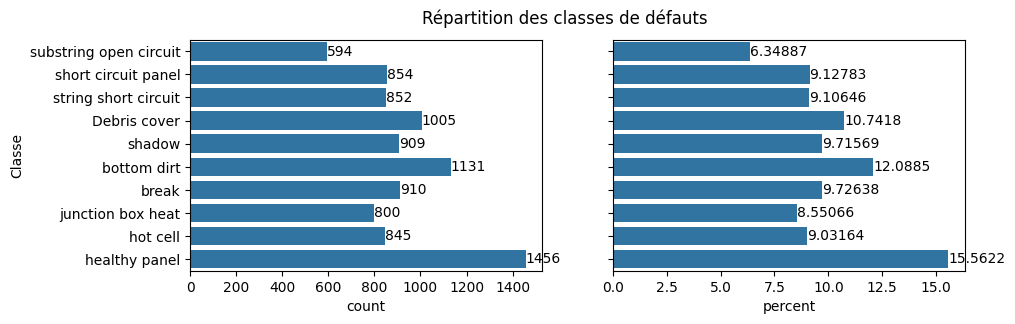

In [22]:
plot_countplots(df_pvf10_filtered_augmented, label="Classe")

## Merge avec le jeu de données initial

On merge cette fois les données avec le jeu complet.

In [23]:
df_pvf10_augmented = pd.concat([df_pvf10, df_pvf10_new_images])

On vérifie ensuite la répartition de chaque classe dans le jeu de données augmenté, mais en ne regardant que le format 110x60.

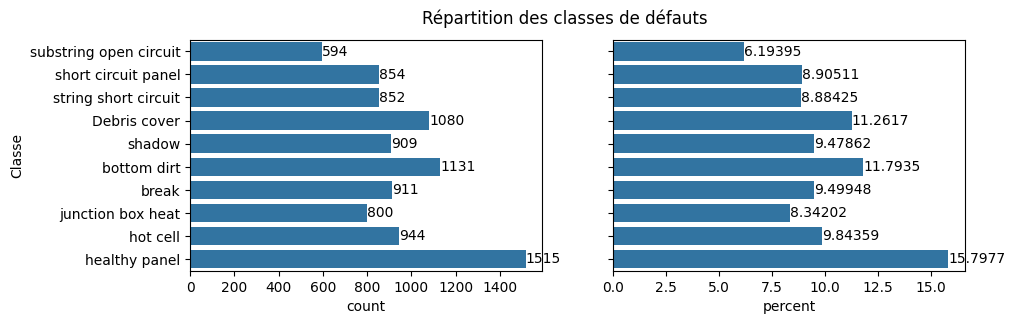

In [24]:
plot_countplots(df_pvf10_augmented.loc[df_pvf10_augmented["Format"] == "110x60"], label="Classe")

In [25]:
df_pvf10_augmented

Chemin  Format Train_Test  \
0     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
1     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
2     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
3     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
4     ../data/raw/PVF-10\PVF_10_110x60\test\01substr...  110x60       test   
...                                                 ...     ...        ...   
4013  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4014  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4015  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4016  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   
4017  ../data/raw/PVF-10/PVF_10_110x60/augmented/xxs...  110x60  augmented   

                      Classe  \
0     substring open circuit   
1     substring open circuit   
2     substring open circuit   
3     substring open circuit   
4     substring open circuit   
...                      ...   
4013    string short circuit   
4014    string short circuit   
4015    string short circuit   
4016    string short circuit   
4017    string short circuit   

                                                    Nom  Type  Largeur  \
0                      DJI_20230228122654_0466_T_000001  .png       60   
1                      DJI_20230228122803_0500_T_000001  .png       60   
2                      DJI_20230228123425_0666_T_000002  .png       60   
3                      DJI_20230228124402_0129_T_000002  .png       60   
4                      DJI_20230228124624_0220_T_000001  .png       60   
...                                                 ...   ...      ...   
4013  DJI_20231121163136_0006_T_000005.ImgComp.jpeg....  .png      110   
4014  DJI_20231121163136_0006_T_000005.ImgComp.jpeg....  .png      110   
4015  DJI_20231121163136_0006_T_000005.ImgComp.webp....  .png      110   
4016  DJI_20231121163136_0006_T_000005.ImgComp.webp....  .png      110   
4017      DJI_20231121163136_0006_T_000005.MedianBlur.3  .png      110   

      Hauteur  Canaux  Doute_Carre  
0         110       3        False  
1         110       3        False  
2         110       3        False  
3         110       3        False  
4         110       3        False  
...       ...     ...          ...  
4013       60       1        False  
4014       60       1        False  
4015       60       1        False  
4016       60       1        False  
4017       60       1        False  

[20734 rows x 10 columns]

# Sauvegarde du jeu de données augmenté

In [26]:
# Chemin du répertoire de destination
target_path = Path(PVF10_PROCESSED_DATA_DIR)

# Export du dataframe
csvfile_path = target_path / "structure_pvf_10_augmented.csv"
df_pvf10_augmented.to_csv(csvfile_path, index=False)
